#  Linear Regression Project

In this project we will explore some features that affect fuel consumption in miles per gallon (MPG) answering some questions about automatic and manual transmissions (am). We are interested in exploring the relationship between a set of variables and Miles Per Gallon (MPG).

In particularly we want answer two questions:

- Is an automatic or manual transmission better for MPG?
- Quantifying how different is the MPG between automatic and manual transmissions?

The data of this project is extracted from the 1974 Motor Trend US magazine.

The data consists of 32 observations on 11 variables.

- **mpg**:	 Miles/(US) gallon
- **cyl**:	 Number of cylinders
- **disp**:	 Displacement (cu.in.)
- **hp**:	 Gross horsepower
- **drat**:	 Rear axle ratio
- **wt**:	 Weight (lb/1000)
- **qsec**:	 1/4 mile time
- **vs**:	 V/S
- **am**:	 Transmission (0 = automatic, 1 = manual)
- **gear**:	 Number of forward gears
- **carb**:	 Number of carburetors

## Importing Required Libraries

In [797]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 

## Loading Data

In [798]:
cars = pd.read_csv('file.csv') # loading the csv file that contains cars-data 

## Explorartory Data Analysis

In [799]:
cars.info()  # shows no. of observation, columns and datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


 The data has 32 observations and 12 columns

In [800]:
cars.columns = ['car_models', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [801]:
cars['am'] = cars['am'].map({1:'Manual',0:"Automatic"})

In [802]:
cars.head(10)

,car_models,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automatic,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automatic,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,Automatic,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,Automatic,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,Automatic,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,Automatic,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,Automatic,4,4


### Box and Count Plot

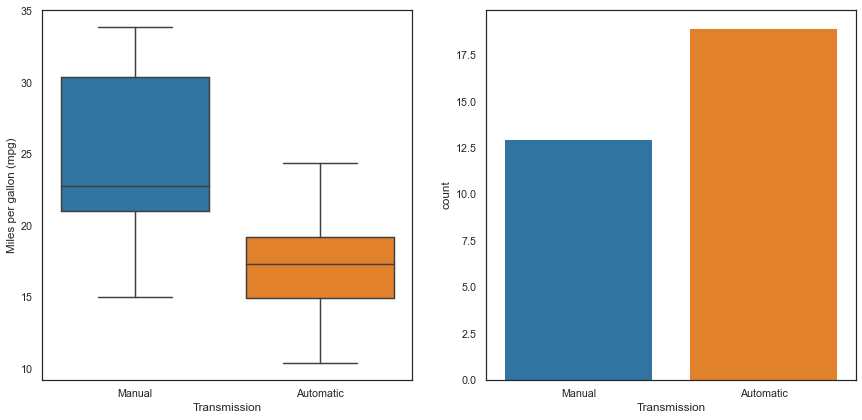

In [803]:
fig = plt.figure(figsize=(15,7), dpi=70) # setting the size and resolution of the picture

plt.subplot(1,2,1) # first plot of first row with two columns
sns.boxplot(x ="am", y ="mpg", data = cars)
plt.xlabel('Transmission')
plt.ylabel("Miles per gallon (mpg)")

plt.subplot(1,2,2)# second plot 
sns.countplot(x ="am", data = cars)
plt.xlabel('Transmission')
plt.show()

The mean for car's with manual transmission is shigher than car's with automatic transmission, as shown in the box plot, and also, the number of cars with manual transmission is higher than car's with automatic transmission (count plot)

### Heatmap

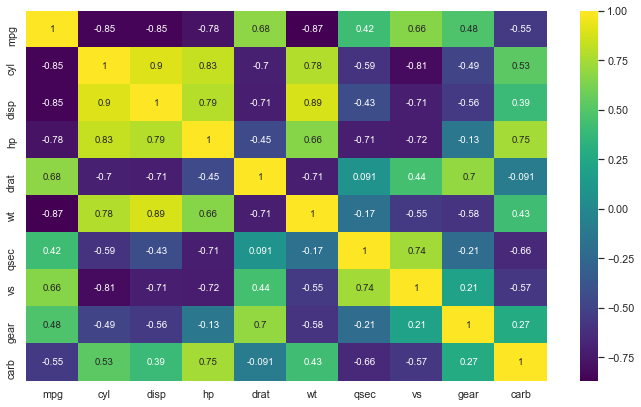

In [804]:
fig = plt.figure(figsize=(12,7), dpi=70)
sns.heatmap(cars.corr(),annot = True, cmap='viridis')
plt.show()

**The heatmap plotted above shows multicollinearity between variables/predictors**
1. Highly correlated varibales are cyl, dsp, carb and wt
2. Vraible such as gear, am, and draft, and  qsec and vs are also highly correlated

### Correlation Bargraph

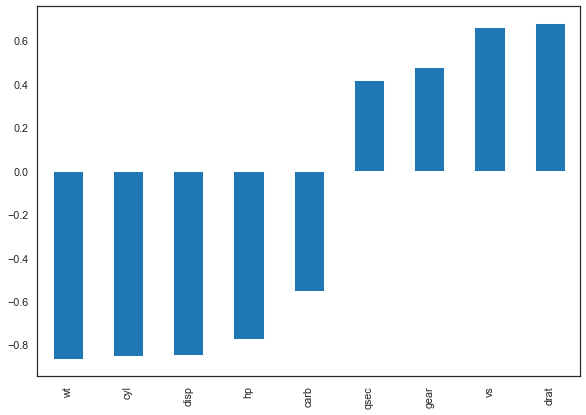

In [805]:
fig = plt.figure(figsize=(10,7), dpi=70)
cars.corr()['mpg'].sort_values().drop('mpg').plot(kind='bar')
plt.show()

The above plot shows the correlation of mpg with its predictors

### Summary

In [806]:
cars[(cars['am']=='Manual')].describe() # summary of data of cars with manual transmission

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077
std,6.166504,1.552500,87.203989,84.062324,0.364051,0.616982,1.792359,0.518875,0.506370,2.177978
min,15.000000,4.000000,71.100000,52.000000,3.540000,1.513000,14.500000,0.000000,4.000000,1.000000
25%,21.000000,4.000000,79.000000,66.000000,3.850000,1.935000,16.460000,0.000000,4.000000,1.000000
50%,22.800000,4.000000,120.300000,109.000000,4.080000,2.320000,17.020000,1.000000,4.000000,2.000000
75%,30.400000,6.000000,160.000000,113.000000,4.220000,2.780000,18.610000,1.000000,5.000000,4.000000
max,33.900000,8.000000,351.000000,335.000000,4.930000,3.570000,19.900000,1.000000,5.000000,8.000000


In [807]:
cars[(cars['am']=='Automatic')].describe() # summary of data of cars with automatic transmission

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
std,3.833966,1.544657,110.171647,53.908196,0.392304,0.777400,1.751308,0.495595,0.418854,1.147079
min,10.400000,4.000000,120.100000,62.000000,2.760000,2.465000,15.410000,0.000000,3.000000,1.000000
25%,14.950000,6.000000,196.300000,116.500000,3.070000,3.437500,17.175000,0.000000,3.000000,2.000000
50%,17.300000,8.000000,275.800000,175.000000,3.150000,3.520000,17.820000,0.000000,3.000000,3.000000
75%,19.200000,8.000000,360.000000,192.500000,3.695000,3.842500,19.170000,1.000000,3.000000,4.000000
max,24.400000,8.000000,472.000000,245.000000,3.920000,5.424000,22.900000,1.000000,4.000000,4.000000


### Two Sample t-Test

Null Hypothesis (H0):There is no difference in means (mpg) for cars with transmissions modes-manual and automatic

In [808]:
automatic_mpg = cars[(cars['am']=='Automatic')]['mpg'] # slicing mpg column data for cars with manual transmission
manual_mpg = cars[(cars['am']== 'Manual')]['mpg'] # slicing mpg column data for cars with automatic transmission

t,p-value = stats.ttest_ind(a = manual_mpg, b = automatic_mpg ,equal_var = False) # two sample t -test

if p-value < 0.05:
    print("We reject null hypothesis Ho and accept alternate hypothesis H1 as there is differnce in means")
else:
    print("We accept null hypothesis that the two means are equal")
    
print("\n")
print("The mean for Manual transmission is :", manual_mpg.mean()) # printing mean for cars with manual transmission
print("The mean for Automatic transmission is:", automatic_mpg.mean()) # printing mean for cars with automatic transmissio
    


We reject null hypothesis Ho and accept alternate hypothesis H1 as there is differnce in means


The mean for Manual transmission is : 24.39230769230769
The mean for Automatic transmission is: 17.147368421052633


## Preparing Data For Modeling

In [785]:
# Converting "am" column into dummy variables
transmission = pd.get_dummies(cars['am'])

# Dropping first column "Automatic" from dataframe "transmission" 
transmission = pd.get_dummies(cars['am'], drop_first = True)

# Adding the transmission to the original df dataframe
cars = pd.concat([cars,transmission], axis = 1)

# Dropping 'am' as we have created the dummies for it
cars.drop(['am'], axis = 1, inplace = True)

cars.head()

,car_models,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb,Manual
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,0


## Models

### Simple Linear Regression Model with One Variable

In [718]:
x = cars['Manual'] # 1 is manual and 0 is automatic
y = cars['mpg']
x = sm.add_constant(x) # Adding constant to the model
model1 =sm.OLS(y,x) # Creating model
model1 =model1.fit() # fitting model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     16.86
Date:                Mon, 23 May 2022   Prob (F-statistic):           0.000285
Time:                        14:45:50   Log-Likelihood:                -95.242
No. Observations:                  32   AIC:                             194.5
Df Residuals:                      30   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1474      1.125     15.247      0.0

**The model** gives low p-value (0.000285) and low R-squares (0.36). It explains only 36 % variance in the mpg but it is statisticaly significant (low p value-less than 0.05). This variance is not only observed in our sample but also in the papulation 

### Multivariate Linear Regression Model

In [749]:
x = cars[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','Manual', 'gear', 'carb']]
y = cars['mpg']
x = sm.add_constant(x)
model2 =sm.OLS(y,x)
model2 =model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.79e-07
Time:                        15:06:51   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

**The above model** explains 87 % variance but most of the predictors have high p-values except wt, am, and qsec which has low p-values-theri contribution to mpg 
is statistically significant. From the above summary, we found that that draft, wt, qsec, vs, am, and gear effects mpg (see coeff), but to ovoid overfitting, we will select only those variables which have high coefficents and are statistically significant (low p-value). Therefore we will use only wt, am, and qsec wihh low-p-values as 
independent variables/predictors for  our final model 

### Final Linear Regression Model

In [752]:
x = cars[[ 'wt','Manual','qsec']]
y = cars['mpg']
x = sm.add_constant(x)
best_model =sm.OLS(y,x)
best_model =best_model.fit()
print(best_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.21e-11
Time:                        15:08:40   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.1

**The models** explains 85% variance in the data and this variance is statistically significant (low p-values)

### ANOVA Test

In [756]:
df_1 = sm.stats.anova_lm(model1,model3,model2)
df_2 =pd.DataFrame({'Models':['model1','modle3','model2']})
df_3 = pd.concat([df_2,df_1], axis = 1)
print(df_3[['Models','Pr(>F)']])

   Models        Pr(>F)
0  model1           NaN
1  modle3  7.502138e-09
2  model2  8.636073e-01


Anova test determines that model3 is the best model as it has the lowet p-value






## Summary

It looks like the best model is the one that includes wt, qsec and am, which means besides transmission types, weight and accelearation also needs to be considered. The model is able to explain 85% of variance. Weight negatively changes mpg, and qsec and am positively changes mpg. Every lb/1000 weight increase will cause a decrease of roughly 4 mpg, every increase of 1/4 mile time will cause an increase of 1.2 mpg, and on average, manual transmission is 2.9 mpg better than automatic transmission. The residual plots also seems to be randomly scattered (see appendix).

Conclusion:
On average, manual transmission is better than automatic transmission by 2.9 mpg. However, transmission type is not the only factor accounting for MPG, weight, and acceleration (1/4 mile time) also needs to be considered.

## Linear Model Diagnostic Tests 
### Linearity and Normality

In [787]:
x = cars[[ 'wt','Manual','qsec']]
x = sm.add_constant(x)
fitted = model3.predict(x)

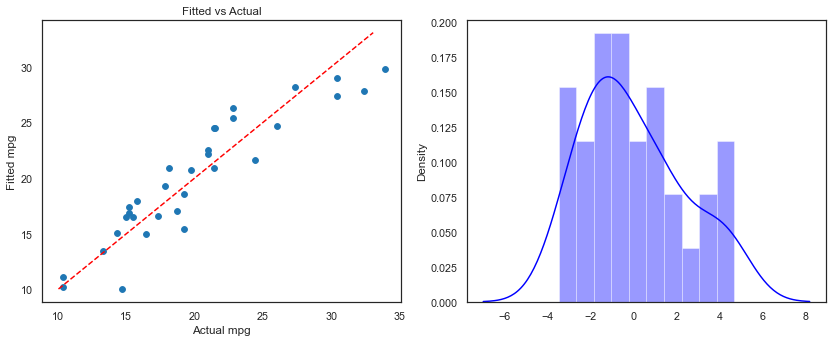

In [809]:
import warnings
warnings.filterwarnings("ignore")
residuals = y-fitted

# Testing linearty by plotting fitted versus actual mpg (left graph)
# The dat poins should lie around the diagnal line on the plot
fig = plt.figure(figsize=(12,5), dpi=70)
plt.subplot(1,2,1)
plt.scatter(y,fitted)
plt.title("Fitted vs Actual")
plt.xlabel('Actual mpg')
plt.ylabel('Fitted mpg')

df_results = pd.DataFrame({"Actual": y, "Predicted": fitted}) # drawing diaognal line
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')

# Checking normality-the residuals/error terms of the model should be normally distributed (right graph)
# Note: if the realtion between predictors and response is not linear, then assumption (normailty)
# might be viltaed
plt.subplot(1,2,2) 
sns.distplot(residuals,bins = 10, color ='blue',kde = True)
plt.tight_layout()

### Relation Between Predictors Variables and Response For "model3"

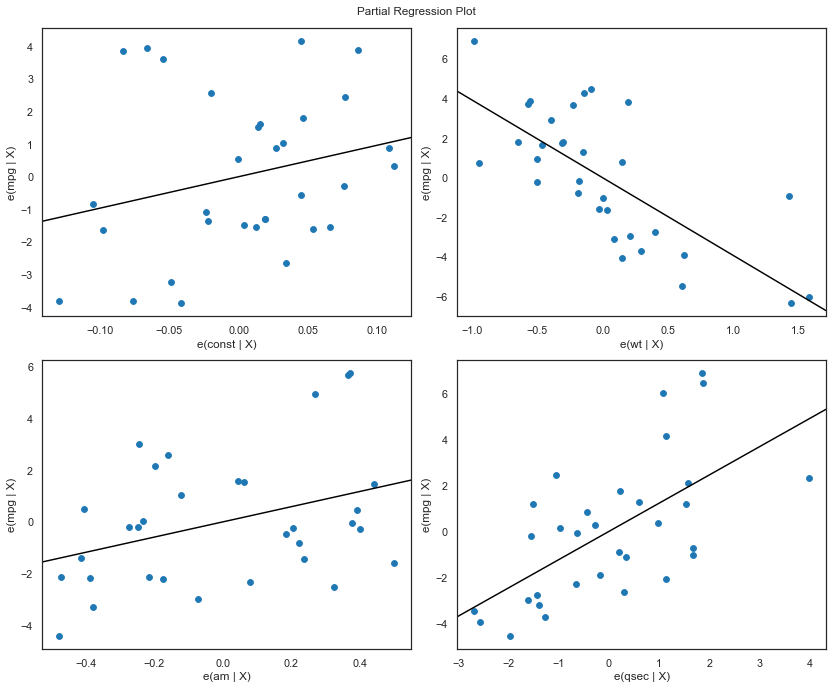

In [759]:
# setting picture size and resolution
fig = plt.figure(figsize=(12,10), dpi=70) 

# ploting scatter graph between predictor (mpg) versus response for all variables of model3
fig = sm.graphics.plot_partregress_grid(model3, fig = fig) 

### Residual plot

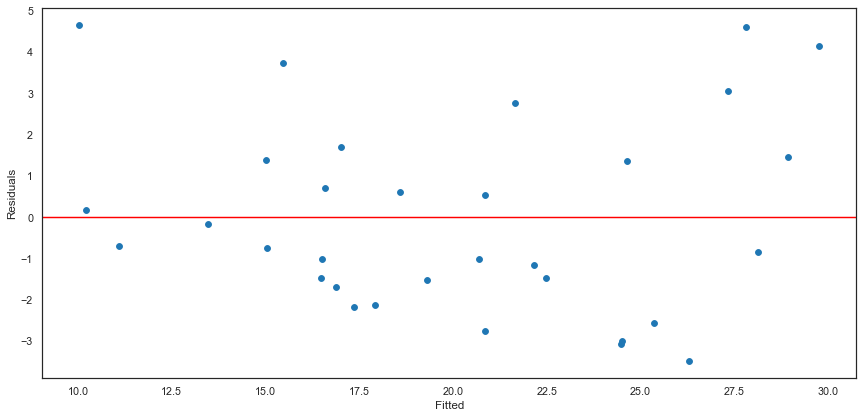

In [794]:
fig = plt.figure(figsize=(15,7), dpi=70) # setting picture resolution and size
plt.scatter(fitted,residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '-') # drawing horizontal line
plt.show()

The points are randomly scatterd around the horizontaline and there seems no pattern to the points that shows the goodness of our model.

In [ ]:
# fig1 = sm.qqplot(residuals, line='45')
# plt.show()
